#  ROC (Receiver Operating Characteristic )  Curve
# AUC (Area Under the Curve ) Score


In [1]:
import pandas as pd
data = pd.read_csv('breast_cancer.csv')
print(data.shape)
data.head()

(569, 31)


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,outcome
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


In [2]:
data.corr().outcome.sort_values()

smoothness error          -0.067016
mean fractal dimension    -0.012838
texture error             -0.008303
symmetry error            -0.006522
fractal dimension error    0.077972
concavity error            0.253730
compactness error          0.292999
worst fractal dimension    0.323872
mean symmetry              0.330499
mean smoothness            0.358560
concave points error       0.408042
mean texture               0.415185
worst symmetry             0.416294
worst smoothness           0.421465
worst texture              0.456903
area error                 0.548236
perimeter error            0.556141
radius error               0.567134
worst compactness          0.590998
mean compactness           0.596534
worst concavity            0.659610
mean concavity             0.696360
mean area                  0.708984
mean radius                0.730029
worst area                 0.733825
mean perimeter             0.742636
worst radius               0.776454
mean concave points        0

In [3]:
X = data.iloc[:,:-1]
y = data.outcome
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: outcome, dtype: int64

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [6]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(C=100)
model.fit(X_train,y_train)
y_predict= model.predict(X_test)

/Users/ashokveda/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [7]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9532163742690059


col_0,0,1
outcome,,
0,106,6
1,2,57


In [8]:
model.predict_proba(X_test)[:,1]

array([9.98995300e-01, 2.34298465e-05, 8.56930664e-05, 9.99999742e-01,
       4.67891673e-04, 3.17454707e-01, 2.49781497e-05, 3.68270134e-01,
       9.99999972e-01, 9.80798039e-01, 1.23315150e-05, 1.19532548e-05,
       9.66618325e-01, 4.83016826e-05, 9.99974499e-01, 9.99552792e-01,
       2.78116705e-04, 3.89930098e-02, 1.10381411e-02, 9.57174253e-01,
       9.90681339e-01, 1.99273192e-01, 7.82507079e-03, 2.09677032e-03,
       1.00000000e+00, 1.00000000e+00, 1.94285397e-01, 1.00000000e+00,
       6.89321741e-05, 3.29788376e-01, 1.74556886e-04, 9.46851631e-04,
       1.00000000e+00, 1.73876604e-04, 3.17678229e-02, 3.84216885e-05,
       8.16849576e-04, 1.77543216e-06, 1.48393313e-04, 2.70525126e-03,
       3.52587098e-05, 8.96489228e-05, 9.48050502e-02, 9.95748778e-01,
       4.40614315e-04, 1.00000000e+00, 9.98595526e-01, 9.99966331e-01,
       9.99176796e-01, 8.24312783e-01, 2.99019915e-02, 5.38044846e-03,
       9.99986271e-01, 4.75431429e-04, 4.04273956e-03, 1.00000000e+00,
      

In [9]:
import numpy as np
y_predict_th3 = np.where(model.predict_proba(X_test)[:,1]>0.3,1,0) # Threshold is 0.3
y_predict_th4 = np.where(model.predict_proba(X_test)[:,1]>0.4,1,0) # Threshold is 0.3

In [10]:
pd.crosstab(y_test,y_predict_th4)

col_0,0,1
outcome,,
0,106,6
1,2,57


In [11]:
def predict_threshold (model,X_test,thresholds):
    import numpy as np
    return np.where(model.predict_proba(X_test)[:,1]>thresholds,1,0) # Threshold is 0.3

In [14]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1):
    y_predict = predict_threshold(model,X_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))

Threshold : 0.0
[[  0 112]
 [  0  59]]
Threshold : 0.1
[[101  11]
 [  0  59]]
Threshold : 0.2
[[102  10]
 [  2  57]]
Threshold : 0.30000000000000004
[[103   9]
 [  2  57]]
Threshold : 0.4
[[106   6]
 [  2  57]]
Threshold : 0.5
[[106   6]
 [  2  57]]
Threshold : 0.6000000000000001
[[106   6]
 [  2  57]]
Threshold : 0.7000000000000001
[[106   6]
 [  3  56]]
Threshold : 0.8
[[106   6]
 [  3  56]]
Threshold : 0.9
[[107   5]
 [  3  56]]


In [15]:
from sklearn.metrics import roc_curve, roc_auc_score

In [16]:
tpr,fpr,thresholds = roc_curve(y_test,model.predict_proba(X_test)[:,1])

In [17]:
thresholds

array([2.00000000e+00, 1.00000000e+00, 9.80798039e-01, 9.73315858e-01,
       9.66618325e-01, 9.57174253e-01, 9.50842470e-01, 8.24312783e-01,
       6.58811425e-01, 2.79218188e-01, 1.99273192e-01, 1.94285397e-01,
       1.07087905e-01, 9.71353160e-09])

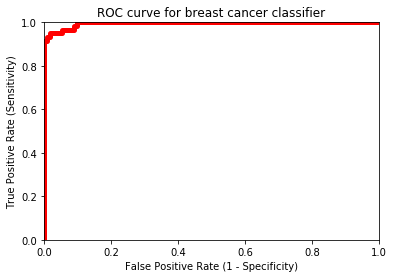

In [22]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve,roc_auc_score
%matplotlib inline
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1],drop_intermediate=False)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for breast cancer classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.plot(fpr, tpr,color='red',lw=5)
plt.show()

In [23]:
roc_auc_score(y_test, model.predict_proba(X_test)[:,1])

0.9954600484261501